# BPM, energy, danceability, happiness, loudness e speechiness

Iniziamo, quindi, ad andare ad analizzare quelli che sono alcuni dei primi fattori che abbiamo presentato poc'anzi: in particolare, iniziamo ad interrogarci quanto i concetti di energia, ballabilità, felicità/valenza, rumorosità e parlabilità (oltre che il dato indicativo dei BPM, battiti per minuto), possano incidere su una canzone.

Partiamo, in primis, da cercare di visualizzare i valori dei fattori scelti nelle 500+ canzoni prese in esame in questo dataset:

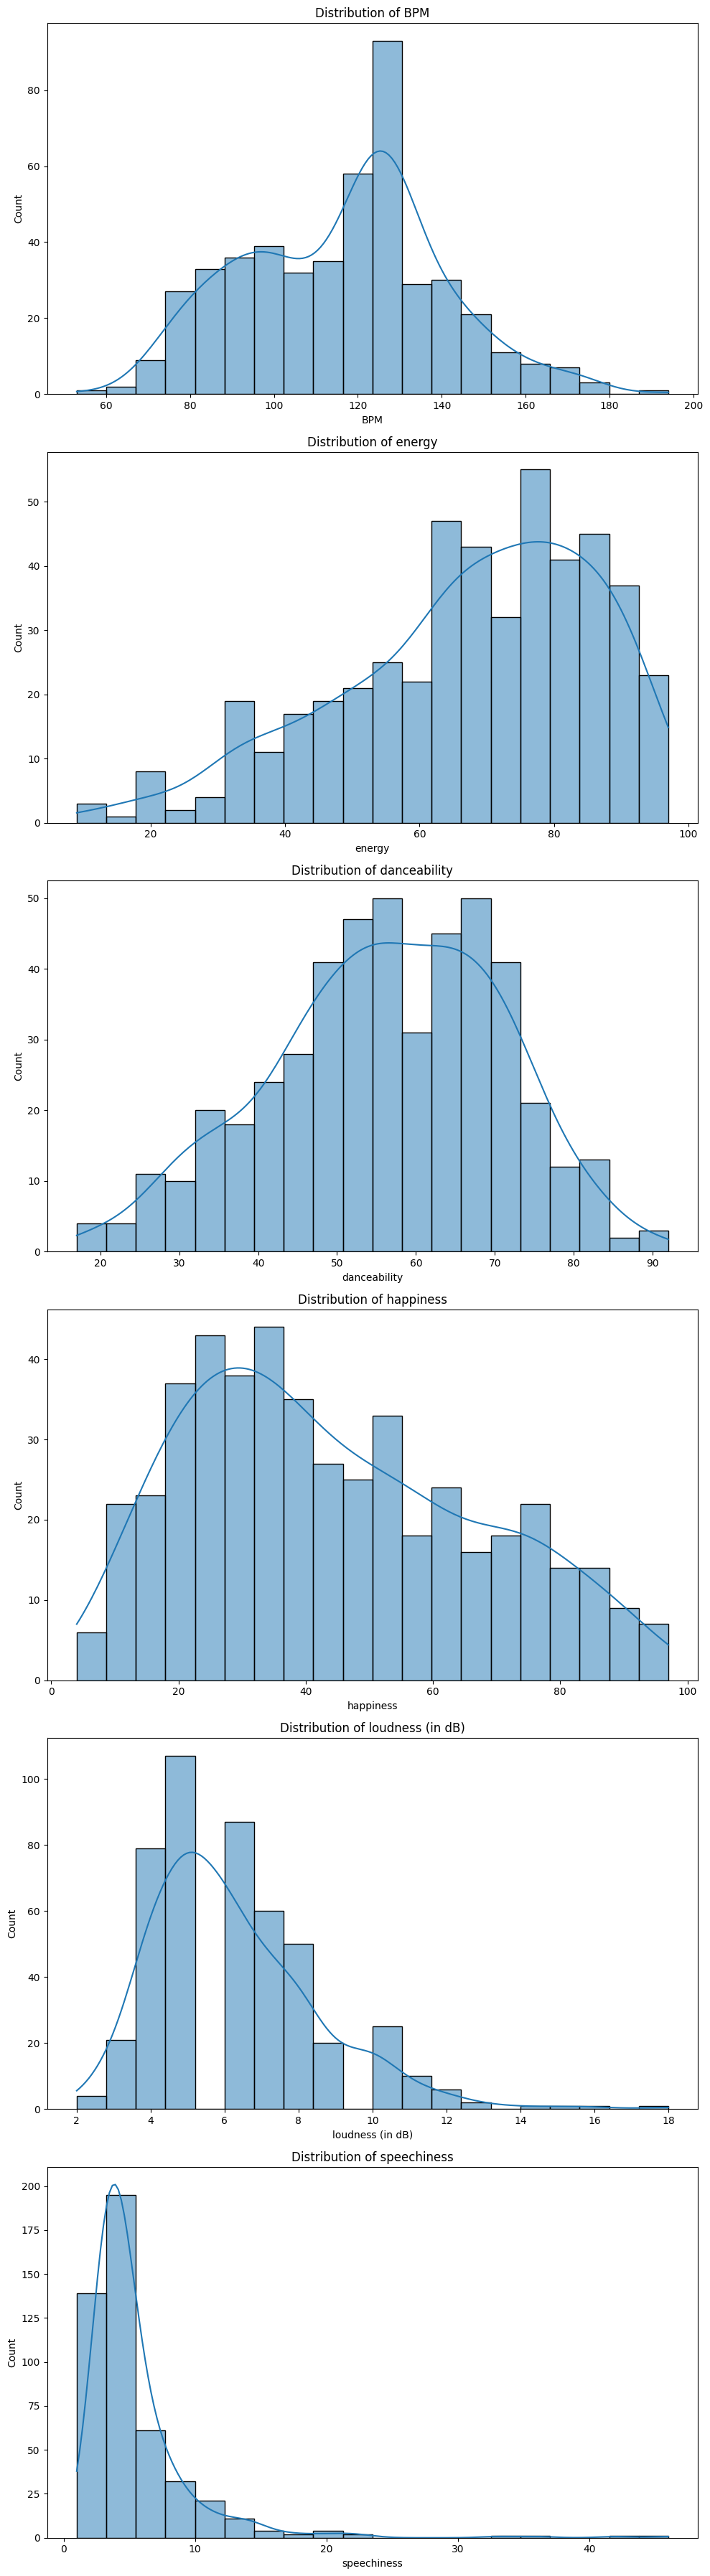

Highest BPM value: 194.0 found in song 'Breaking My Heart' by Reiley (2023, Denmark)
Lowest BPM value: 53.0 found in song 'Moj svijet' by Sergej cetkovic (2014, Montenegro)


Highest energy value: 97.0 found in song 'Story of My Life' by Naviband (2017, Belarus)
Lowest energy value: 9.0 found in song 'Sunlight' by Nicky Byrne (2016, Ireland)


Highest danceability value: 92.0 found in song 'In corpore sano' by Konstrakta (2022, Serbia)
Lowest danceability value: 17.0 found in song 'I Stand' by Gabriela Guncikova (2016, Czech Republic)


Highest happiness value: 97.0 found in song 'Haba Haba' by Stella Mwangi (2011, Norway)
Lowest happiness value: 4.0 found in song 'When We're Old' by Ieva Zasimauskaite (2018, Lithuania)


Highest loudness (in dB) value: 18.0 found in song 'Amar pelos dois' by Salvador Sobral (2017, Portugal)
Lowest loudness (in dB) value: 2.0 found in song 'Space Man' by Sam Ryder (2022, United Kingdom)


Highest speechiness value: 46.0 found in song 'Aven Romale' by G

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il file CSV
file_path = './song_data.csv'
pd.set_option('display.max_rows', None)
data = pd.read_csv(file_path, encoding='latin1')

# Assuming 'data' is your DataFrame containing the dataset
columns_to_plot = ['BPM', 'energy', 'danceability', 'happiness', 'loudness (in dB)', 'speechiness']

# Set up the matplotlib figure, ensuring each subplot spans the full width of the figure
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 6 * len(columns_to_plot)))

# Iterate over the selected columns to create a full-scale histogram for each
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], kde=True, ax=axs[i], bins=20)  # Adjust bins as needed
    axs[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Specify the columns of interest
columns_of_interest = ['BPM', 'energy', 'danceability', 'happiness', 'loudness (in dB)', 'speechiness']

# Iterate through each column of interest
for column in columns_of_interest:
    # Initialize variables to store the highest and lowest values and their row indexes for the current column
    highest_value = float('-inf')
    highest_value_row_index = None
    lowest_value = float('inf')
    lowest_value_row_index = None

    # Iterate through each row in the DataFrame
    for index, row in data.iterrows():
        # Access the value for the current row and column
        value = row[column]
        # Check if the current value is not "-" and is a number
        if value != "-" and pd.to_numeric(value, errors='coerce') is not None:
            value = float(value)
            # Check if the current value is higher than the highest value found so far
            if value > highest_value:
                # Update the highest value and its row index
                highest_value = value
                highest_value_row_index = index
            # Check if the current value is lower than the lowest value found so far
            if value < lowest_value:
                # Update the lowest value and its row index
                lowest_value = value
                lowest_value_row_index = index

    # Assuming the columns for artist, song, year, and country are named 'artist_name', 'song_name', 'year', 'country'
    highest_artist = data.loc[highest_value_row_index, 'artist_name']
    highest_song = data.loc[highest_value_row_index, 'song_name']
    highest_year = data.loc[highest_value_row_index, 'year']
    highest_country = data.loc[highest_value_row_index, 'country']
    
    lowest_artist = data.loc[lowest_value_row_index, 'artist_name']
    lowest_song = data.loc[lowest_value_row_index, 'song_name']
    lowest_year = data.loc[lowest_value_row_index, 'year']
    lowest_country = data.loc[lowest_value_row_index, 'country']

    # Print the details along with the highest and lowest values for the current column
    print(f"Highest {column} value: {highest_value} found in song '{highest_song}' by {highest_artist} ({highest_year}, {highest_country})")
    print(f"Lowest {column} value: {lowest_value} found in song '{lowest_song}' by {lowest_artist} ({lowest_year}, {lowest_country})")
    print("\n")

Da quello che possiamo osservare, notiamo come in generale la tendenza tra le varie canzoni presentate all'Eurovision Song Contest, dal 2009 al 2023, la partecipazione di molte canzoni che, in media, sembrano rappresentare un quadro molto particolare: infatti, le nazioni partecipanti hanno generalmente portato in gara delle canzoni che presentano un alto valore di BPM (circa 130), un valore di energia che si attesta attorno all'80% e un valore di ballabilità vicino al 60% circa.

Canzoni, quindi, che potremmo definire rapide, allegre e, apparentemente gioiose: ma allo stesso tempo, andando a vedere i testi dei vari brani presentati, emerge sicuramente un alto tasso di canzoni con un livello di felicità che si attesta attorno appena al 30% e con un valore di loudness/volume pari a, in media, circa appena 3 dB registrati.


# E le canzoni vincitrici?

Ci andiamo, quindi, a chiedere quali siano i valori aggiornati di tali dati utilizzando un filtro legato alla vittoria (o meno) della determinata canzone.
In sintesi, quindi, vogliamo cercare di definire quanto questa tendenza sia rispettata, ragionando in ottica di vittoria eurovisiva.

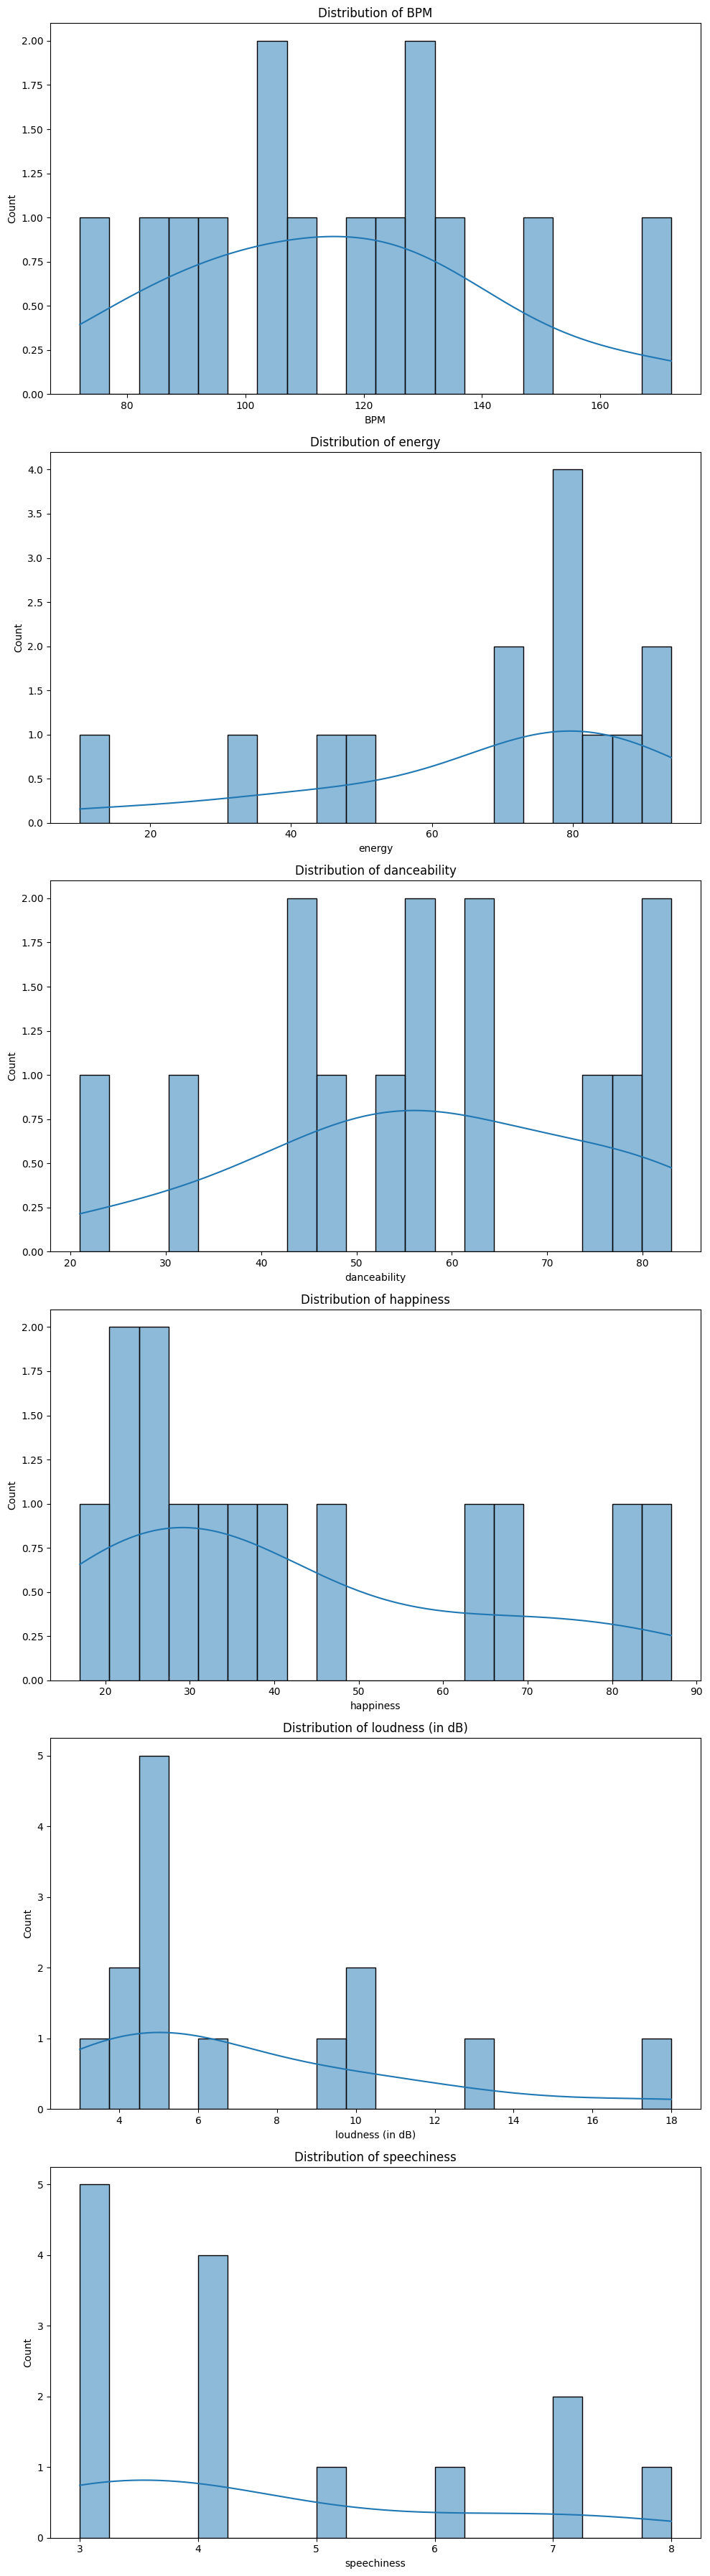

Highest BPM value: 172.0 found in song 'Running Scared' by Ell & Nikki (2011, Azerbaijan)
Lowest BPM value: 72.0 found in song 'Arcade' by Duncan Laurence (2019, Netherlands)


Highest energy value: 94.0 found in song 'Zitti e buoni' by Maneskin (2021, Italy)
Lowest energy value: 10.0 found in song 'Amar pelos dois' by Salvador Sobral (2017, Portugal)


Highest danceability value: 83.0 found in song 'Stefania' by Kalush Orchestra (2022, Ukraine)
Lowest danceability value: 21.0 found in song 'Amar pelos dois' by Salvador Sobral (2017, Portugal)


Highest happiness value: 87.0 found in song 'Satellite' by Lena (2010, Germany)
Lowest happiness value: 17.0 found in song 'Amar pelos dois' by Salvador Sobral (2017, Portugal)


Highest loudness (in dB) value: 18.0 found in song 'Amar pelos dois' by Salvador Sobral (2017, Portugal)
Lowest loudness (in dB) value: 3.0 found in song 'Zitti e buoni' by Maneskin (2021, Italy)


Highest speechiness value: 8.0 found in song 'Tattoo' by Loreen (2023, 

In [4]:
# Filtra le canzoni vincenti
winning_songs = data[data['final_place'] == 1]

# Assuming 'data' is your DataFrame containing the dataset
columns_to_plot = ['BPM', 'energy', 'danceability', 'happiness', 'loudness (in dB)', 'speechiness']

# Set up the matplotlib figure, ensuring each subplot spans the full width of the figure
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 6 * len(columns_to_plot)))

# Iterate over the selected columns to create a full-scale histogram for each
for i, column in enumerate(columns_to_plot):
    sns.histplot(winning_songs[column], kde=True, ax=axs[i], bins=20)  # Adjust bins as needed
    axs[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Specify the columns of interest
columns_of_interest = ['BPM', 'energy', 'danceability', 'happiness', 'loudness (in dB)', 'speechiness']

# Iterate through each column of interest
for column in columns_of_interest:
    # Initialize variables to store the highest and lowest values and their row indexes for the current column
    highest_value = float('-inf')
    highest_value_row_index = None
    lowest_value = float('inf')
    lowest_value_row_index = None

    # Iterate through each row in the DataFrame
    for index, row in winning_songs.iterrows():
        # Access the value for the current row and column
        value = row[column]
        # Check if the current value is not "-" and is a number
        if value != "-" and pd.to_numeric(value, errors='coerce') is not None:
            value = float(value)
            # Check if the current value is higher than the highest value found so far
            if value > highest_value:
                # Update the highest value and its row index
                highest_value = value
                highest_value_row_index = index
            # Check if the current value is lower than the lowest value found so far
            if value < lowest_value:
                # Update the lowest value and its row index
                lowest_value = value
                lowest_value_row_index = index

    # Assuming the columns for artist, song, year, and country are named 'artist_name', 'song_name', 'year', 'country'
    highest_artist = winning_songs.loc[highest_value_row_index, 'artist_name']
    highest_song = winning_songs.loc[highest_value_row_index, 'song_name']
    highest_year = winning_songs.loc[highest_value_row_index, 'year']
    highest_country = winning_songs.loc[highest_value_row_index, 'country']
    
    lowest_artist = winning_songs.loc[lowest_value_row_index, 'artist_name']
    lowest_song = winning_songs.loc[lowest_value_row_index, 'song_name']
    lowest_year = winning_songs.loc[lowest_value_row_index, 'year']
    lowest_country = winning_songs.loc[lowest_value_row_index, 'country']

    # Print the details along with the highest and lowest values for the current column
    print(f"Highest {column} value: {highest_value} found in song '{highest_song}' by {highest_artist} ({highest_year}, {highest_country})")
    print(f"Lowest {column} value: {lowest_value} found in song '{lowest_song}' by {lowest_artist} ({lowest_year}, {lowest_country})")
    print("\n")

Da ciò che notiamo, in realtà, la tendenza sembra essere più che confermata: a parte piccole sfumature di arrotondamento, ci ritroviamo nuovamente ad avere un valore di BPM tendente a 120, un valore di energia che si attesta attorno all'80% e un valore di ballabilità vicino al 60% circa.

Anche in questo caso emerge un alto tasso di canzoni con un livello di felicità che si attesta attorno appena al 30% e con un valore di loudness/volume pari a, in media, circa appena 5 dB registrati.